In [45]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import YearLocator, DateFormatter

%matplotlib inline


conflict_df = pd.read_csv("Resources\Wars.csv")
commoditiy_df = pd.read_csv("Resources\commdataclean.csv")

In [39]:
community_df = commoditiy_df.iloc[1:]
commoditiy_df.drop(0, inplace=True)

In [44]:


# Method 1: Using a list of columns to keep
keep_cols = ['Date','Wheat, US HRW', 'Gold', 'Rice, Thai 5% ']
df_filtered = commoditiy_df[keep_cols]  # Select only the columns you want to keep


df_filtered


,Date,"Wheat, US HRW",Gold,"Rice, Thai 5%"
1,1960-01-01,59.89,35.27,104.45
2,1960-02-01,60.99,35.27,103.54
3,1960-03-01,61.73,35.27,103.79
4,1960-04-01,60.99,35.27,100.97
5,1960-05-01,57.69,35.27,102.15
...,...,...,...,...
767,2023-11-01,283.55,1984.11,598.00
768,2023-12-01,291.12,2026.18,644.00
769,2024-01-01,283.91,2034.04,660.00
770,2024-02-01,278.50,2023.24,624.00


AttributeError: 'Timestamp' object has no attribute 'dt'

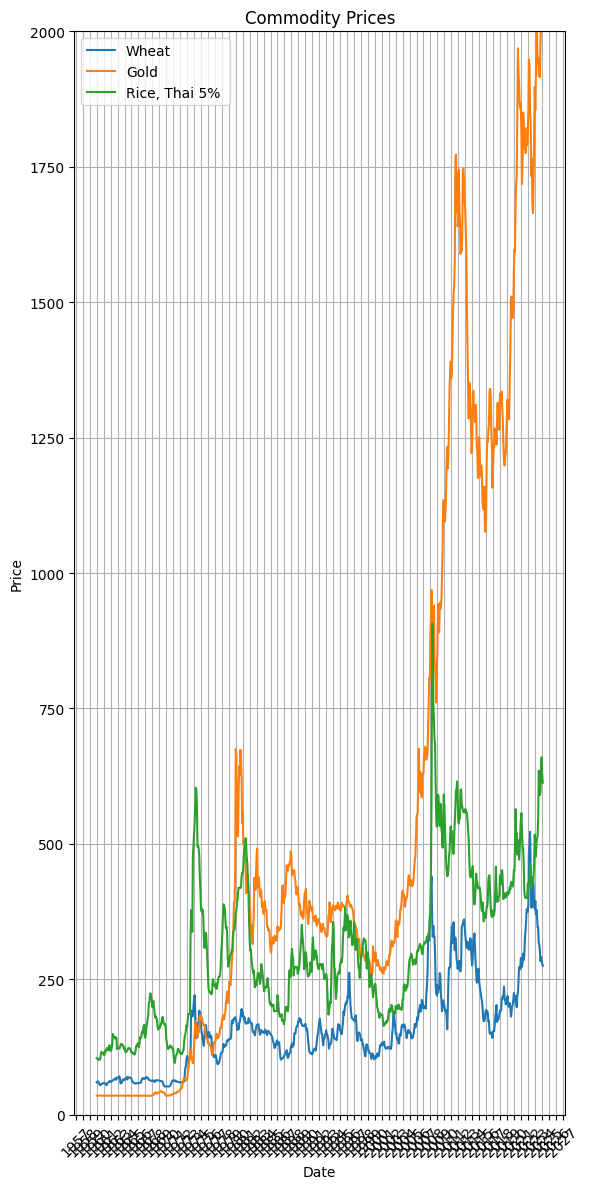

In [57]:



df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered['Wheat, US HRW'] = df_filtered['Wheat, US HRW'].apply(float)
df_filtered['Gold'] = df_filtered['Gold'].apply(float)
df_filtered['Rice, Thai 5% '] = df_filtered['Rice, Thai 5% '].apply(float)
war_data = pd.read_csv("Resources\warlist.csv")
war_data = war_data.rename(columns={"Years": "Start Year"})
# Extract end year and update "Years" column (efficient)
war_data["Start Year"], war_data["End Year"] = zip(*war_data["Start Year"].str.split(" - "))

# Optional: Remove leading "- " (if present)
war_data["End Year"] = war_data["End Year"].str.lstrip("- ")


war_data["Start Year"] = war_data["Start Year"].astype(str)  # Ensure it's a string
war_data["Start Date"] = pd.to_datetime(war_data["Start Year"], format='%Y')
war_data["End Year"] = war_data["End Year"].astype(str)  # Ensure it's a string
war_data["End Date"] = pd.to_datetime(war_data["End Year"], format='%Y')
war_data
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import numpy as np  # Needed for heatmap
from datetime import datetime  # Assuming Start Date is datetime format
import pandas as pd  # Needed for data manipulation

# Increase figure size
plt.figure(figsize=(6, 12))

# Plot with labels and title (adjust y-axis range to 2000)
lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# Now set the y-axis limits after creating the lines
plt.ylim(0, 2000)  # Set y-axis range to (2000)

# Ensure Start Date and End Date are datetime format (if necessary)
if not pd.api.types.is_datetime64_dtype(war_data["Start Date"]):
    try:
        # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
        war_data["Start Date"] = pd.to_datetime(war_data["Start Date"], format='%Y-%m-%d')  # Adjust format if needed
    except ValueError:
        print("Error: Inconsistent date format in 'Start Date'. Please check and adjust the format string in pd.to_datetime().")
        # Handle the case where conversion fails due to inconsistent formatting

if not pd.api.types.is_datetime64_dtype(war_data["End Date"]):
    try:
        # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
        war_data["End Date"] = pd.to_datetime(war_data["End Date"], format='%Y-%m-%d')  # Adjust format if needed
    except ValueError:
        print("Error: Inconsistent date format in 'End Date'. Please check and adjust the format string in pd.to_datetime().")
        # Handle the case where conversion fails due to inconsistent formatting

# Calculate year ranges for heatmap
years = war_data["Start Date"].dt.year  # Extract years from Start Date (assuming conversion successful)
# Create a binary array indicating conflict presence (1) or absence (0) for each year
conflict_presence = np.zeros(len(years))  # Initialize with zeros (no conflict)
for index, row in war_data.iterrows():
    start_year = row["Start Date"].dt.year.item()  # Extract year from datetime
    end_year = row["End Date"].dt.year.item()  # Extract year from datetime
    for year in range(start_year, end_year + 1):
        conflict_presence[year - years[0]] = 1  # Mark years with conflict (1)

AttributeError: 'Timestamp' object has no attribute 'dt'

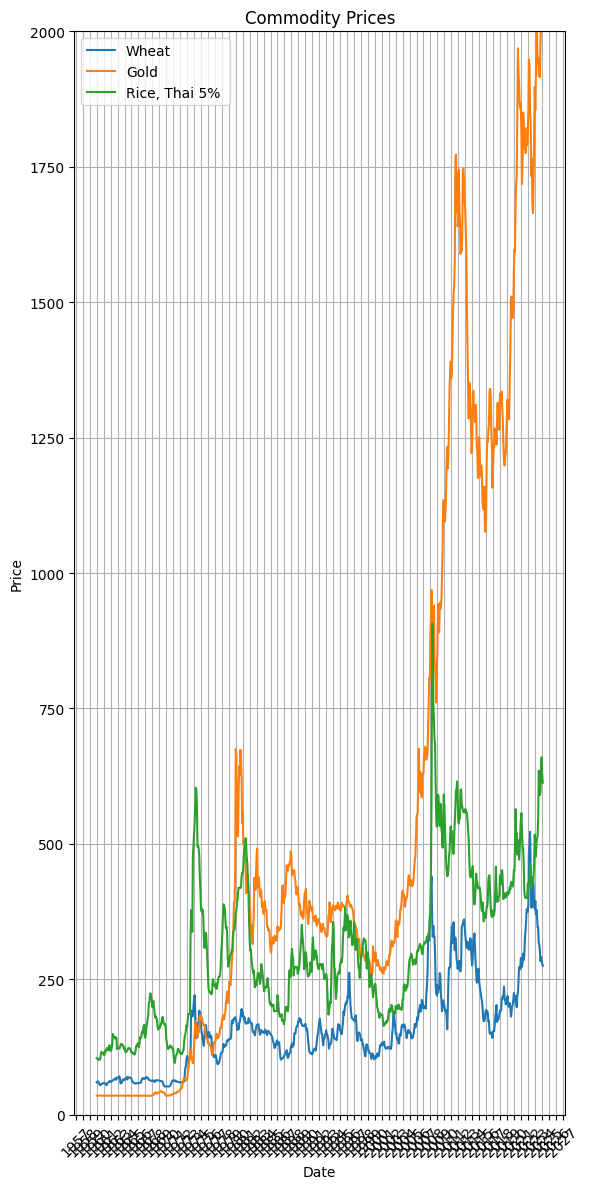

In [54]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import numpy as np  # Needed for heatmap
from datetime import datetime  # Assuming Start Date is datetime format
import pandas as pd  # Needed for data manipulation

# Increase figure size
plt.figure(figsize=(6, 12))

# Plot with labels and title (adjust y-axis range to 2000)
lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# Now set the y-axis limits after creating the lines
plt.ylim(0, 2000)  # Set y-axis range to (2000)

# Ensure Start Date and End Date are datetime format (if necessary)
if not pd.api.types.is_datetime64_dtype(war_data["Start Date"]):
    try:
        # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
        war_data["Start Date"] = pd.to_datetime(war_data["Start Date"], format='%Y-%m-%d')  # Adjust format if needed
    except ValueError:
        print("Error: Inconsistent date format in 'Start Date'. Please check and adjust the format string in pd.to_datetime().")
        # Handle the case where conversion fails due to inconsistent formatting

if not pd.api.types.is_datetime64_dtype(war_data["End Date"]):
    try:
        # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
        war_data["End Date"] = pd.to_datetime(war_data["End Date"], format='%Y-%m-%d')  # Adjust format if needed
    except ValueError:
        print("Error: Inconsistent date format in 'End Date'. Please check and adjust the format string in pd.to_datetime().")
        # Handle the case where conversion fails due to inconsistent formatting

# Calculate year ranges for heatmap
years = war_data["Start Date"].dt.year  # Extract years from Start Date (assuming conversion successful)

# Create a binary array indicating conflict presence (1) or absence (0) for each year
conflict_presence = np.zeros(len(years))  # Initialize with zeros (no conflict)
for index, row in war_data.iterrows():
    start_year = row["Start Date"].dt.year.item()  # Extract year from datetime
    end_year = row["End Date"].dt.year.item()  # Extract year from datetime
    for year in range(start_year, end_year + 1):
        conflict_presence[year - years[0]] = 1  # Mark years with conflict (1)

# Calculate conflict years
conflict_years = []
for index, row in war_data.iterrows():
    start_year = row["Start Date"].dt.year.item()  # Extract year from datetime
    end_year = row["End Date"].dt.year.item()  # Extract year from datetime
    for year in range(start_year, end_year + 1):
        conflict_years.append(year)

# Plot points for conflict years (consider marker and color customization)
plt.scatter(conflict_years, np.zeros(len(conflict_years)), marker='o', color='red', s=50, label='Conflict Year')  # Adjust marker, color, and size

# Heatmap plot (adjust extent for point visibility if needed)
extent = (min(years), max(years), 0, 1.1)  # Adjust extent for year range and binary values
cmap = plt.cm.binary  # Choose a colormap for conflict presence (e.g., black for conflict, white for no conflict)
plt.imshow(conflict_presence.reshape(-1, 1), extent=extent, cmap=cmap, alpha=0.7)

# Inverted x-axis for heatmap (optional)

plt.colorbar(label="Conflict Presence (1 = Conflict)")  # Add colorbar with label
# plt.gca().invert_xaxis()
plt.show()

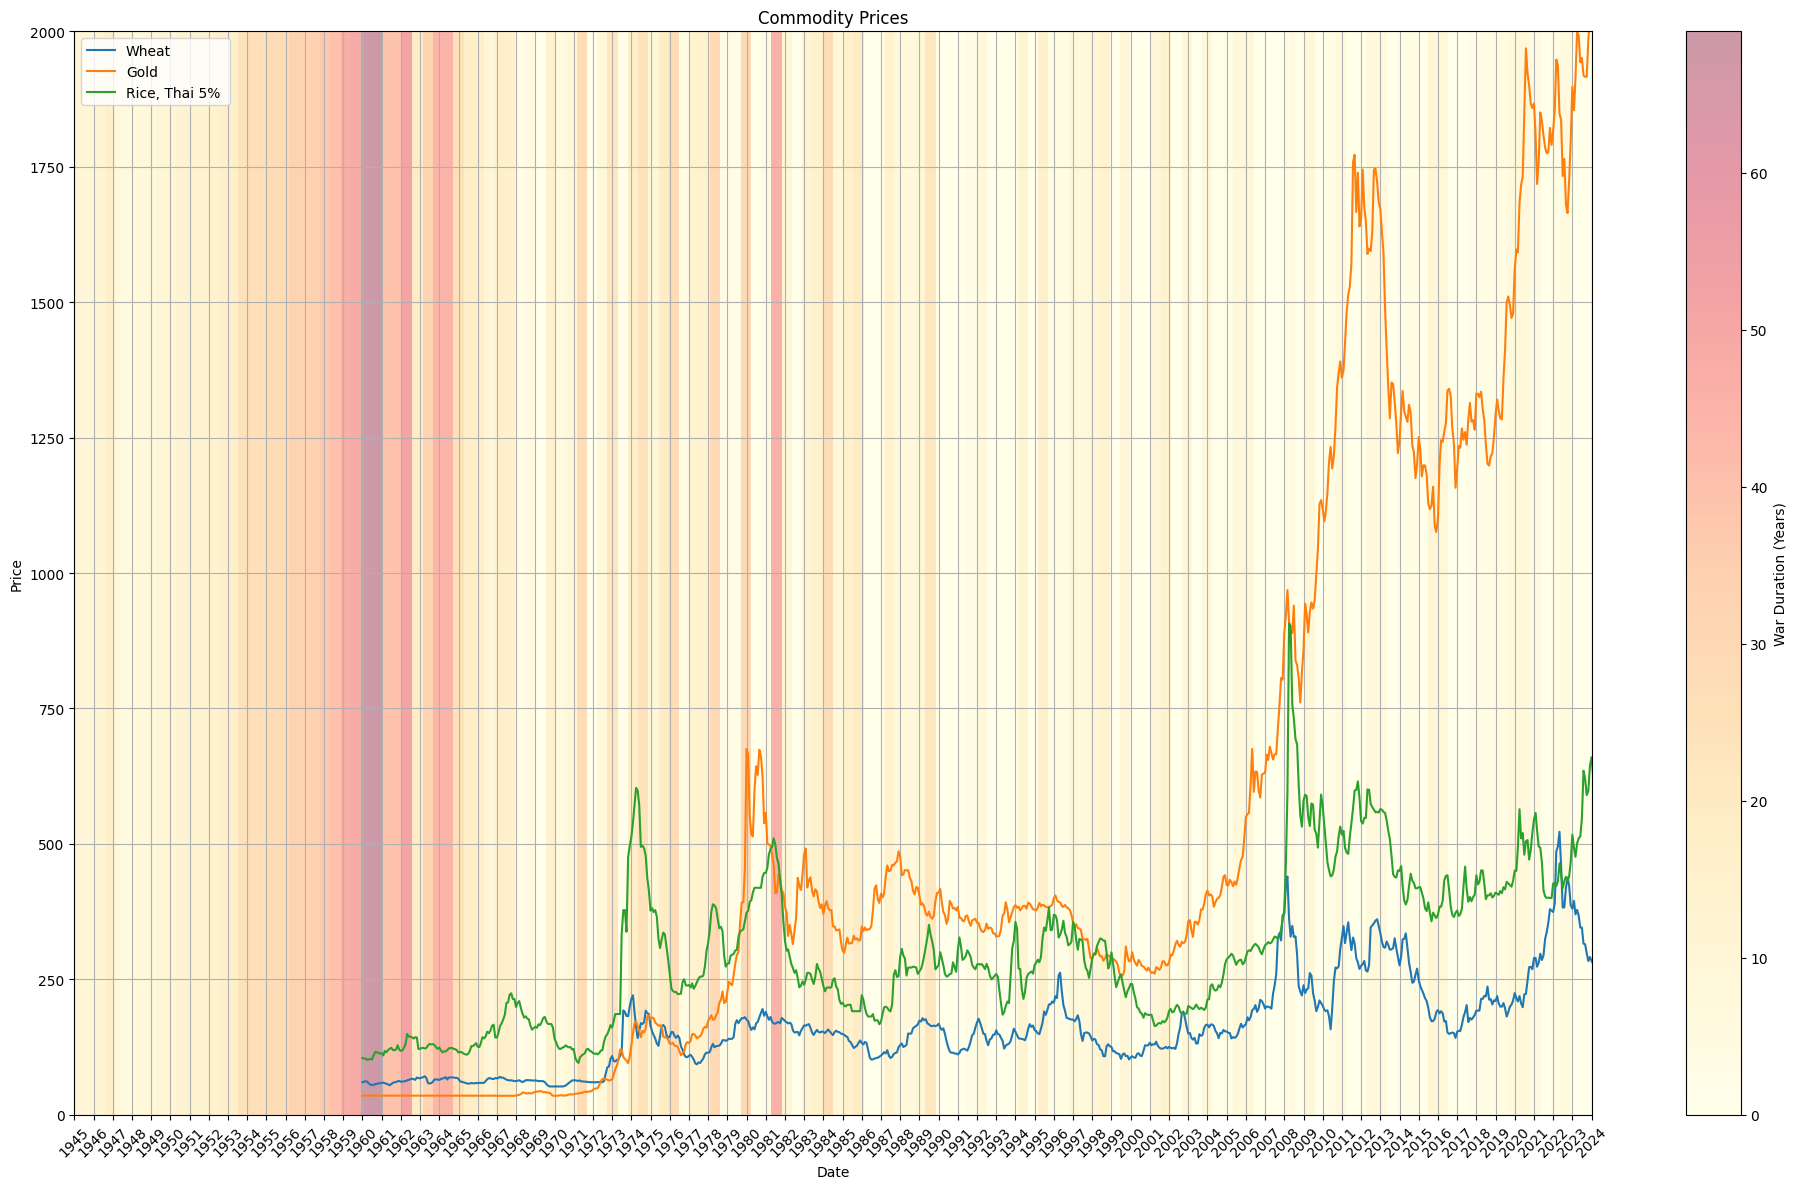

In [51]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import numpy as np  # Needed for heatmap
from datetime import datetime  # Assuming Start Date is datetime format

# Increase figure size
plt.figure(figsize=(20, 12))  # Swap width and height for vertical orientation

# Plot with labels and title
lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# Now set the y-axis limits after creating the lines
plt.ylim(0, 2000)  # Set y-axis range to (0, 2000)

# Calculate year ranges for heatmap (assuming Start Date and End Date represent years)
years = war_data["Start Date"].dt.year  # Extract years from Start Date
durations = (war_data["End Date"].dt.year - years)  # Calculate durations (End Year - Start Year)

# Create a colormap for the heatmap
cmap = plt.cm.YlOrRd  # Choose a colormap (e.g., YlOrRd represents yellow to red)

# Create a 2D array for the heatmap data (transpose for vertical orientation)
heatmap_data = np.zeros((len(durations), 1))  # One column for durations
heatmap_data[:, 0] = durations.values  # Assign durations to the heatmap data
heatmap_data = heatmap_data.T  # Transpose the data for vertical heatmap

# Plot the heatmap (using y-axis for durations)
extent = (min(date2num(war_data["Start Date"])), max(date2num(war_data["End Date"])), 0, max(durations) + 2000)  # Adjust extent as needed
plt.imshow(heatmap_data, extent=extent, cmap=cmap, alpha=0.4, aspect='auto')

# Inverted x-axis for heatmap (optional)
# plt.gca().invert_xaxis()  # Invert x-axis to align with price x-axis (optional)

plt.colorbar(label="War Duration (Years)")  # Add colorbar with label

plt.show()

AttributeError: 'Timestamp' object has no attribute 'dt'

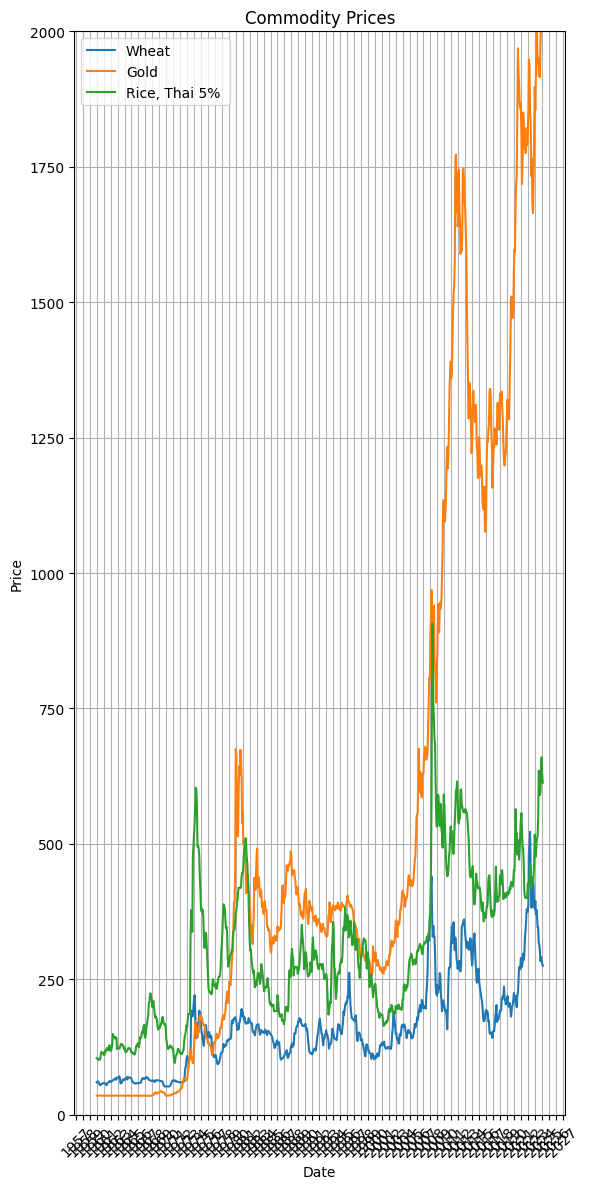

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import numpy as np  # Needed for heatmap
from datetime import datetime  # Assuming Start Date is datetime format

# Increase figure size
plt.figure(figsize=(6, 12))  # Swap width and height for vertical orientation

# Plot with labels and title (adjust y-axis range to 2000)
lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# Now set the y-axis limits after creating the lines
plt.ylim(0, 2000)  # Set y-axis range to (0, 2000)

# Calculate year ranges for heatmap
years = war_data["Start Date"].dt.year  # Extract years from Start Date

# Create a binary array indicating conflict presence (1) or absence (0) for each year
conflict_presence = np.zeros(len(years))  # Initialize with zeros (no conflict)
for index, row in war_data.iterrows():
    start_year = row["Start Date"].dt.year.item()  # Extract year from datetime (assuming single value)
    end_year = row["End Date"].dt.year.item()  # Extract year from datetime (assuming single value)
    for year in range(start_year, end_year + 1):
        conflict_presence[year - years[0]] = 1  # Mark years with conflict (1)

# Plot the heatmap (using y-axis for years)
extent = (min(years), max(years), 0, 1.1)  # Adjust extent for year range and binary values
cmap = plt.cm.binary  # Choose a colormap for conflict presence (e.g., black for conflict, white for no conflict)
plt.imshow(conflict_presence.reshape(-1, 1), extent=extent, cmap=cmap, alpha=0.7)

# Inverted x-axis for heatmap (optional)
# plt.gca().invert_xaxis()  # Invert x-axis to align with price x-axis (optional)

plt.colorbar(label="Conflict Presence (1 = Conflict)")  # Add colorbar with label

plt.show()

In [ ]:
war_data = pd.read_csv("Resources\warlist.csv")
war_data = war_data.rename(columns={"Years": "Start Year"})
# Extract end year and update "Years" column (efficient)
war_data["Start Year"], war_data["End Year"] = zip(*war_data["Start Year"].str.split(" - "))

# Optional: Remove leading "- " (if present)
war_data["End Year"] = war_data["End Year"].str.lstrip("- ")


war_data["Start Year"] = war_data["Start Year"].astype(str)  # Ensure it's a string
war_data["Start Date"] = pd.to_datetime(war_data["Start Year"], format='%Y')
war_data["End Year"] = war_data["End Year"].astype(str)  # Ensure it's a string
war_data["End Date"] = pd.to_datetime(war_data["End Year"], format='%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   War         148 non-null    object        
 1   Start Year  148 non-null    object        
 2   End Year    148 non-null    object        
 3   Start Date  148 non-null    datetime64[ns]
 4   End Date    148 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 5.9+ KB


NameError: name 'date2num' is not defined

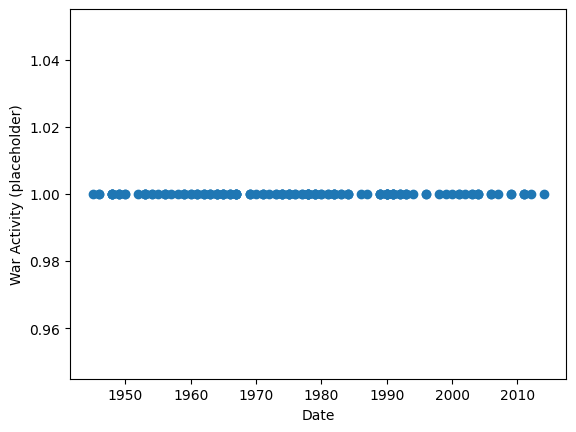

In [ ]:
war_data.info()
war_data



# Create the plot
fig, ax = plt.subplots()

# Loop through each war and plot data points (optional)
for index, row in war_data.iterrows():
     plt.plot([row["Start Date"], row["End Date"]], [1, 1], label=row["War"])

# Alternatively, use scatter plot for many data points
plt.scatter(war_data["Start Date"], [1 for _ in range(len(war_data))], label="Wars")  # Adjust y-values if needed

# Set labels and title
plt.xlabel("Date")
plt.ylabel("War Activity (placeholder)")  # Adjust label based on your data

# Function to improve date axis formatting (optional)
def format_date_axis(ax):
  plt.setp(ax.xaxis.dateticklabels, rotation=45)  # Rotate x-axis labels
  fig.autofmt_xdate()  # Improve date label formatting

# Plot area spans for war durations
for index, row in war_data.iterrows():
  start_date_num = date2num(row["Start Date"])
  end_date_num = date2num(row["End Date"])
  ax.axvspan(start_date_num, end_date_num, alpha=0.3, label=row["War"])

# Add legend
#plt.legend(title="Wars")

# Date axis formatting (call the function if desired)
format_date_axis(ax)

# Display the plot
plt.show()
